<a href="https://colab.research.google.com/github/barbarajunq131/Programas/blob/main/exercicio_3_atrasado__desenvolvimento_regional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disciplina :  CEA0004 - Desenvolvimento Regional - T01 (2025.2) /n

Aluna: Bárbara Junqueira dos Santos /n

Matricula: 20252001826 /n

Lista de exercício: 03/n

link do colab: https://colab.research.google.com/drive/1uAEAi1xhBxP2-DjzaZ8kOV3vmvr0MlvS#scrollTo=PQXmsPBUL6z9

ATIVIDADE 3:
Aplicação da Lei de Zipf à rede de cidades de um estado brasileiro


1. Escolher um Estado da federação.

2. Coletar dados da população dos municípios do Estado.

Fonte sugerida: www.ipeadata.gov.br

- Caminho: REGIONAL>Nível geográfico>Municípios>Temas>População.

- Marcar “População Residente Total”;

- Em “Escolha a abrangência”, escolher o estado de interesse;

- Exportar planilha Excel nas opções no alto à direita;

- Escolher o ano mais recente.

3. De posse dos dados, ordenar a população dos municípios em ordem decrescente (do maior para o menor). Dica: Na aba “Dados”, use o comando “Classificar”.

4. Criar mais uma coluna com o ranking: 1, 2, 3...

5. No Excel, fazer um gráfico de dispersão (xy) em que x = posição no ranking (1, 2, 3, ...) e y = população dos municípios.

6. Linearizar, fazendo log(x) e log(y); refazer o gráfico de dispersão. (*)

7. Fazer um ajustamento linear simples, ilustrando no gráfico.

- Clique com o botão direito sobre uma observação no gráfico e aparecerá a opção “adicionar linha de tendência”;

- Na caixa que se abrirá, marcar as opções “Exibir equação no gráfico” e “Exibir valor de R-quadrado no gráfico”.

8. Observar e interpretar, segundo a Lei de Zipf, o valor do parâmetro q (coeficiente de inclinação) e do coeficiente R2.

________________________

(*) A equação   pode ser linearizada fazendo-se Log(Pr)=log(P1) – qLog(r).


### 1. Instalar pacotes necessários



In [17]:
!pip install pandas matplotlib numpy requests openpyxl --quiet

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Coletar dados de população municipal no IPEA
### Série: População residente total (IPEA)


In [39]:
caminho = "/content/ipeadata[30-10-2025-10-02].csv"
df = pd.read_csv(url, sep=';', encoding='latin1')

In [40]:
df = pd.read_csv(caminho, sep=';', encoding='latin1', skiprows=1)


In [41]:
print("Colunas encontradas:", list(df.columns))
df.head()

Colunas encontradas: ['Sigla', 'CÃ³digo', 'MunicÃ\xadpio', '2022', 'Unnamed: 4']


,Sigla,CÃ³digo,MunicÃ­pio,2022,Unnamed: 4
0,SP,3500105,Adamantina,34687.0,NaN
1,SP,3500204,Adolfo,4351.0,NaN
2,SP,3500303,AguaÃ­,32072.0,NaN
3,SP,3500402,Ãguas da Prata,7369.0,NaN
4,SP,3500501,Ãguas de LindÃ³ia,17930.0,NaN


### 3.Renomear colunas


In [42]:
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'Sigla': 'UF',
    'CÃ³digo': 'Codigo',
    'MunicÃ\xadpio': 'Municipio',
    '2022': 'Populacao'
})

### 4. Corrigir nomes dos municípios

In [43]:
df['Municipio'] = df['Municipio'].str.encode('latin1').str.decode('utf-8')

### 5. Eliminar colunas que não serão usadas

In [44]:
if 'Unnamed: 4' in df.columns:
    df = df.drop(columns=['Unnamed: 4'])

### 4.Ordenar e criar ranking


In [52]:
df = df.sort_values(by='Populacao', ascending=False)
df['Ranking'] = np.arange(1, len(df) + 1)
df.head(30)

,UF,Codigo,Municipio,Populacao,Ranking
562,SP,3550308,São Paulo,11451999.0,1
212,SP,3518800,Guarulhos,1291771.0,2
108,SP,3509502,Campinas,1139047.0,3
544,SP,3548708,São Bernardo do Campo,810729.0,4
534,SP,3547809,Santo André,748919.0,5
387,SP,3534401,Osasco,728615.0,6
581,SP,3552205,Sorocaba,723682.0,7
487,SP,3543402,Ribeirão Preto,698642.0,8
557,SP,3549904,São José dos Campos,697054.0,9
556,SP,3549805,São José do Rio Preto,480393.0,10


### 5. Gráfico População x Ranking

In [53]:
import matplotlib.ticker as mticker

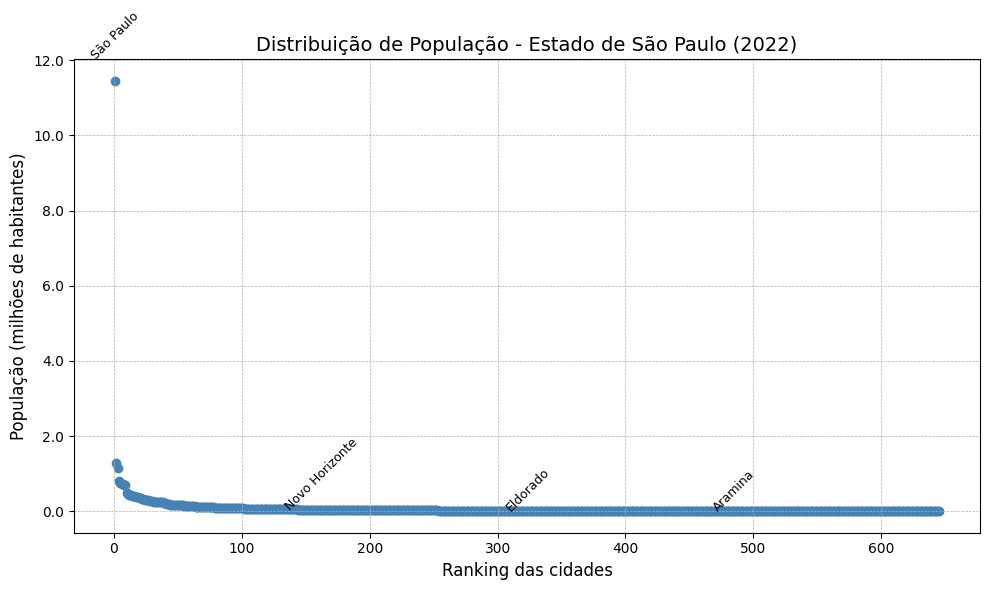

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(df['Ranking'], df['Populacao'], color='steelblue')

# 🧮 Ajuste automático da unidade de medida (mil ou milhões)
max_pop = df['Populacao'].max()
if max_pop > 1_000_000:
    divisor = 1_000_000
    unidade = "milhões de habitantes"
else:
    divisor = 1_000
    unidade = "mil habitantes"

# Configurar eixos e título
plt.ylabel(f"População ({unidade})", fontsize=12)
plt.xlabel("Ranking das cidades", fontsize=12)
plt.title("Distribuição de População - Estado de São Paulo (2022)", fontsize=14)

# Ajustar valores do eixo Y para a unidade correta
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/divisor:,.1f}'))

# Selecionar cidades de referência
maior = df.iloc[0]
menor = df.iloc[-1]
intermed_idx = [len(df)//4, len(df)//2, 3*len(df)//4]
intermed = df.iloc[intermed_idx]

referencias = pd.concat([maior.to_frame().T, intermed, menor.to_frame().T])

# Adicionar rótulos ao gráfico
for _, row in referencias.iterrows():
    plt.text(row['Ranking'], row['Populacao']*1.05, row['Municipio'],
             fontsize=9, ha='center', rotation=45)

plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()




### 6.Gráfico log-log (Lei de Zipf)

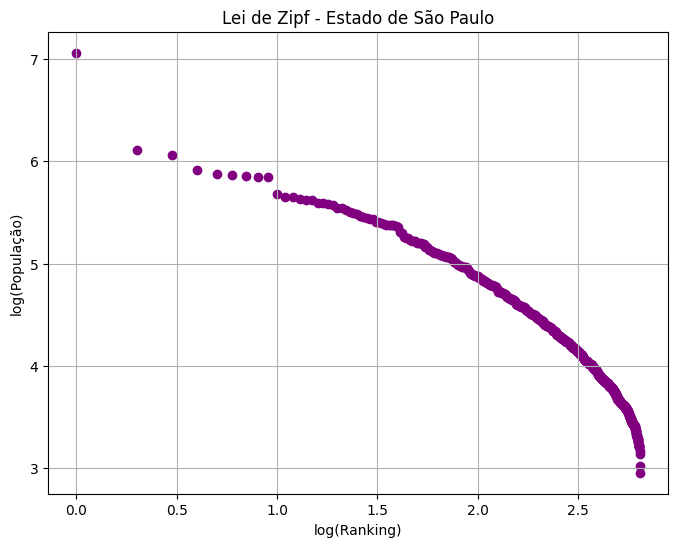

In [55]:
df['log_ranking'] = np.log10(df['Ranking'])
df['log_pop'] = np.log10(df['Populacao'])

plt.figure(figsize=(8,6))
plt.scatter(df['log_ranking'], df['log_pop'], color='purple')
plt.xlabel("log(Ranking)")
plt.ylabel("log(População)")
plt.title("Lei de Zipf - Estado de São Paulo")
plt.grid(True)
plt.show()

### 7.Ajuste linear (Lei de Zipf)

In [56]:
coef = np.polyfit(df['log_ranking'], df['log_pop'], 1)
q = -coef[0]      # coeficiente da Lei de Zipf
intercept = coef[1]

### 8. Calcular R²

In [57]:
pred = np.polyval(coef, df['log_ranking'])
r2 = 1 - np.sum((df['log_pop'] - pred)**2) / np.sum((df['log_pop'] - np.mean(df['log_pop']))**2)

### 9. Gráfico com linha de tendência

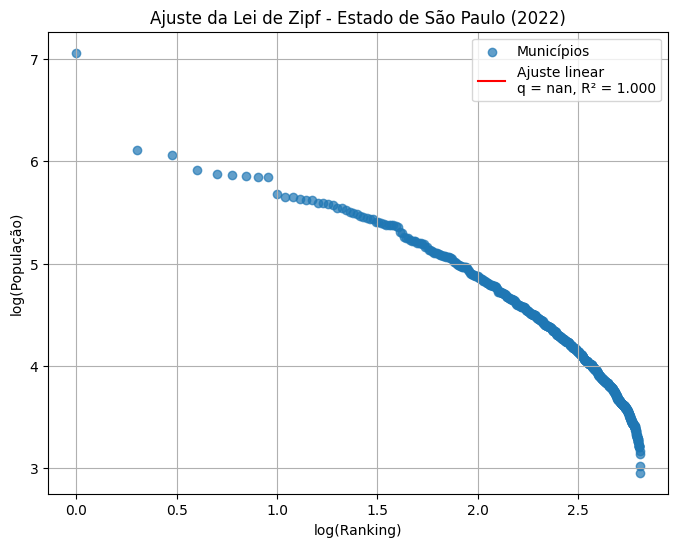

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(df['log_ranking'], df['log_pop'], label="Municípios", alpha=0.7)
plt.plot(df['log_ranking'], pred, color='red', label=f"Ajuste linear\nq = {q:.2f}, R² = {r2:.3f}")
plt.xlabel("log(Ranking)")
plt.ylabel("log(População)")
plt.title("Ajuste da Lei de Zipf - Estado de São Paulo (2022)")
plt.legend()
plt.grid(True)
plt.show()

### 10. Resultados finais

In [59]:
print(f"Coeficiente de inclinação (q): {q:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.3f}")

Coeficiente de inclinação (q): nan
Coeficiente de determinação (R²): 1.000
